2. Fix mol file for the handful of molecules with 4 binds to N issues
3. Check if the active sites have shared fingerprints

In [5]:
from rdkit import Chem
from rdkit.Chem import AllChem
import os
import pandas as pd
from ngcc_ml import group_aromatics

from IPython.display import SVG

from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole, MolsToGridImage, rdMolDraw2D
from rdkit.Chem import Draw
from rdkit.Chem import rdMolTransforms

In [2]:
df = pd.read_csv("/home/nricke/work/ngcc_ml/DidItBindv5.csv", index_col=0)
df.rename(columns={"Catalyst Name":"catalyst_name"}, inplace=True)
df["Doesitbind"] = df["Doesitbind"].astype("int")
df_active = df[df["Doesitbind"] == 1]

In [3]:
moldir = "/home/nricke/work/klodaya/notebooks_klodaya/allfiles/catalystonly-molfiles-chargefix"
catalyst_mols = {}
molfile_list = os.listdir(moldir)
for molfile in molfile_list:
    mol = Chem.MolFromMolFile(os.path.join(moldir, molfile), removeHs=False)
    print(molfile)
    catalyst_mols[molfile] = mol

sf224x0_optsp_a0m2.mol
sf101x0_optsp_c1m2.mol
sf249x0_optsp_a0m2.mol
sf221x0_optsp_a0m2.mol
sf152x0_optsp_a0m2.mol
sf123x0_optsp_a0m2.mol
sf245x0_optsp_a0m2.mol
sf205x0_optsp_c1m2.mol
sf117x0_optsp_a0m2.mol
sf13x1_optsp_c1m2.mol
sf227x0_optsp_a0m2.mol
sf138x0_optsp_a0m2.mol
sf135x0_optsp_a0m2.mol
sf257x0_optsp_a0m2.mol
sf186x0_optsp_a0m2.mol
sf2x0_optsp_a0m2.mol
sf281x0_optsp_a0m2.mol
sf260x0_optsp_c1m2.mol
sf25x1_optsp_a0m2.mol
sf11x0_optsp_a0m2.mol
sf24x1_optsp_a0m2.mol
sf82x0_optsp_a0m2.mol
sf106x0_optsp_a0m2.mol
sf253x0_optsp_a0m2.mol
sf159x0_optsp_a0m2.mol
sf132x0_optsp_a0m2.mol
sf184x0_optsp_a0m2.mol
sf172x0_optsp_a0m2.mol
sf209x0_optsp_c1m2.mol
sf21x2_optsp_a0m2.mol
sf171x0_optsp_a0m2.mol
sf79x0_optsp_a0m2.mol
sf244x0_optsp_a0m2.mol
sf147x0_optsp_a0m2.mol
sf99x0_optsp_a0m2.mol
sf127x0_optsp_a0m2.mol
sf31x1_optsp_a0m2.mol
sf95x0_optsp_c1m2.mol
sf139x0_optsp_a0m2.mol
sf190x0_optsp_c1m2.mol
sf201x0_optsp_a0m2.mol
sf76x0_optsp_a0m2.mol
sf43x0_optsp_a0m2.mol
sf174x0_optsp_a0m2.mol
sf

In [4]:
df_mol = pd.DataFrame.from_dict(catalyst_mols, orient="index").reset_index().rename(columns={0:"mol", "index":"filename"})
df_mol = df_mol.assign(catalyst_name=df_mol.filename.str.split("_").str[0])

In [5]:
df_mol

,filename,mol,catalyst_name
0,sf224x0_optsp_a0m2.mol,<rdkit.Chem.rdchem.Mol object at 0x7f7a7f995cb0>,sf224x0
1,sf101x0_optsp_c1m2.mol,<rdkit.Chem.rdchem.Mol object at 0x7f7a7fa668a0>,sf101x0
2,sf249x0_optsp_a0m2.mol,<rdkit.Chem.rdchem.Mol object at 0x7f7a7f995530>,sf249x0
3,sf221x0_optsp_a0m2.mol,<rdkit.Chem.rdchem.Mol object at 0x7f7a7f995c60>,sf221x0
4,sf152x0_optsp_a0m2.mol,<rdkit.Chem.rdchem.Mol object at 0x7f7a7f9955d0>,sf152x0
5,sf123x0_optsp_a0m2.mol,<rdkit.Chem.rdchem.Mol object at 0x7f7a7f9959e0>,sf123x0
6,sf245x0_optsp_a0m2.mol,<rdkit.Chem.rdchem.Mol object at 0x7f7a7f995760>,sf245x0
7,sf205x0_optsp_c1m2.mol,<rdkit.Chem.rdchem.Mol object at 0x7f7a7f995620>,sf205x0
8,sf117x0_optsp_a0m2.mol,<rdkit.Chem.rdchem.Mol object at 0x7f7a7f9972b0>,sf117x0
9,sf13x1_optsp_c1m2.mol,<rdkit.Chem.rdchem.Mol object at 0x7f7a7f997490>,sf13x1


In [106]:
df_fp = df_active.merge(df_mol.drop_duplicates(subset="catalyst_name"), on="catalyst_name", how="inner")

In [52]:
for atom in m.GetAtoms():
    atom.SetProp('atomLabel',str(atom.GetIdx()))

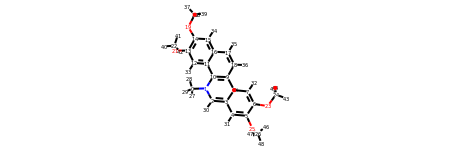

In [71]:
m

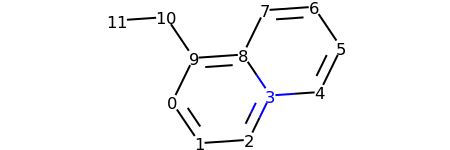

In [34]:
sm = "C1=CC=[N+]2C=CC=CC2=C1CC"
m = Chem.MolFromSmiles(sm)
for atom in m.GetAtoms():
    atom.SetProp('atomLabel',str(atom.GetIdx()))
m

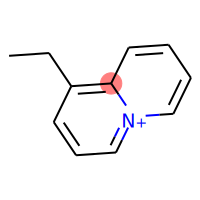

In [45]:
sm = "C1=CC=[N+]2C=CC=CC2=C1CC"
m = Chem.MolFromSmiles(sm)
d = rdMolDraw2D.MolDraw2DSVG(200, 200)
d.SetFontSize(0.75)
hit_ats = [8]
rdMolDraw2D.PrepareAndDrawMolecule(d, m, highlightAtoms=hit_ats)
d.FinishDrawing()
svg = d.GetDrawingText()
display(SVG(svg.replace('svg:','')))

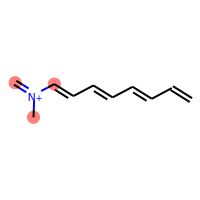

In [10]:
sm = "C=[N+](C)C=CC=CC=CC=C"
m = Chem.MolFromSmiles(sm)
d = rdMolDraw2D.MolDraw2DSVG(200, 200)
d.SetFontSize(0.75)
hit_ats = [0,2,3]
rdMolDraw2D.PrepareAndDrawMolecule(d, m, highlightAtoms=hit_ats)
d.FinishDrawing()
svg = d.GetDrawingText()
display(SVG(svg.replace('svg:','')))

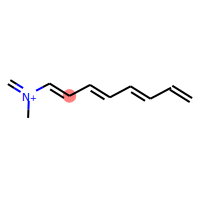

In [11]:
sm = "C=[N+](C)C=CC=CC=CC=C"
m = Chem.MolFromSmiles(sm)
d = rdMolDraw2D.MolDraw2DSVG(200, 200)
d.SetFontSize(0.75)
hit_ats = [4]
rdMolDraw2D.PrepareAndDrawMolecule(d, m, highlightAtoms=hit_ats)
d.FinishDrawing()
svg = d.GetDrawingText()
display(SVG(svg.replace('svg:','')))

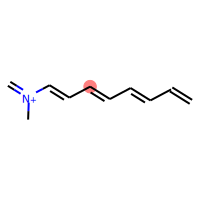

In [12]:
sm = "C=[N+](C)C=CC=CC=CC=C"
m = Chem.MolFromSmiles(sm)
d = rdMolDraw2D.MolDraw2DSVG(200, 200)
d.SetFontSize(0.75)
hit_ats = [5]
rdMolDraw2D.PrepareAndDrawMolecule(d, m, highlightAtoms=hit_ats)
d.FinishDrawing()
svg = d.GetDrawingText()
display(SVG(svg.replace('svg:','')))

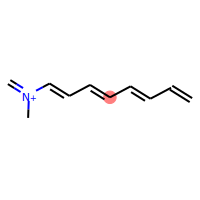

In [13]:
sm = "C=[N+](C)C=CC=CC=CC=C"
m = Chem.MolFromSmiles(sm)
d = rdMolDraw2D.MolDraw2DSVG(200, 200)
d.SetFontSize(0.75)
hit_ats = [6]
rdMolDraw2D.PrepareAndDrawMolecule(d, m, highlightAtoms=hit_ats)
d.FinishDrawing()
svg = d.GetDrawingText()
display(SVG(svg.replace('svg:','')))

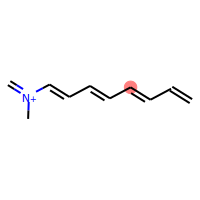

In [14]:
sm = "C=[N+](C)C=CC=CC=CC=C"
m = Chem.MolFromSmiles(sm)
d = rdMolDraw2D.MolDraw2DSVG(200, 200)
d.SetFontSize(0.75)
hit_ats = [7]
rdMolDraw2D.PrepareAndDrawMolecule(d, m, highlightAtoms=hit_ats)
d.FinishDrawing()
svg = d.GetDrawingText()
display(SVG(svg.replace('svg:','')))

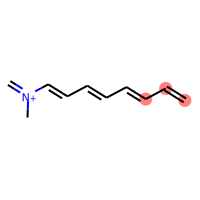

In [15]:
sm = "C=[N+](C)C=CC=CC=CC=C"
m = Chem.MolFromSmiles(sm)
d = rdMolDraw2D.MolDraw2DSVG(200, 200)
d.SetFontSize(0.75)
hit_ats = [8,9,10]
rdMolDraw2D.PrepareAndDrawMolecule(d, m, highlightAtoms=hit_ats)
d.FinishDrawing()
svg = d.GetDrawingText()
display(SVG(svg.replace('svg:','')))

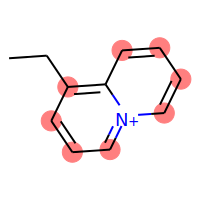

In [46]:
sm = "C1=CC=[N+]2C=CC=CC2=C1CC"
m = Chem.MolFromSmiles(sm)
d = rdMolDraw2D.MolDraw2DSVG(200, 200)
d.SetFontSize(0.75)
hit_ats = [0,1,2,4,5,6,7,9]
rdMolDraw2D.PrepareAndDrawMolecule(d, m, highlightAtoms=hit_ats)
d.FinishDrawing()
svg = d.GetDrawingText()
display(SVG(svg.replace('svg:','')))

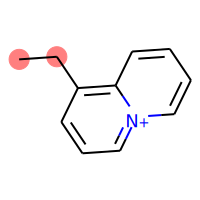

In [47]:
sm = "C1=CC=[N+]2C=CC=CC2=C1CC"
m = Chem.MolFromSmiles(sm)
d = rdMolDraw2D.MolDraw2DSVG(200, 200)
d.SetFontSize(0.75)
hit_ats = [10, 11]
rdMolDraw2D.PrepareAndDrawMolecule(d, m, highlightAtoms=hit_ats)
d.FinishDrawing()
svg = d.GetDrawingText()
display(SVG(svg.replace('svg:','')))

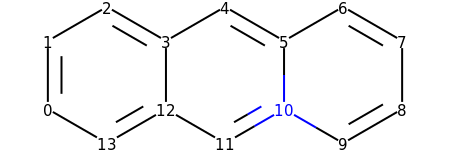

In [13]:
sm = "C1=CC=C2C=C3C=CC=C[N+]3=CC2=C1"
m = Chem.MolFromSmiles(sm)
for atom in m.GetAtoms():
    atom.SetProp('atomLabel',str(atom.GetIdx()))
m

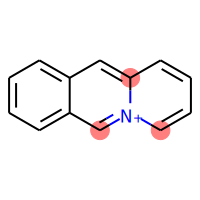

In [41]:
sm = "C1=CC=C2C=C3C=CC=C[N+]3=CC2=C1"
m = Chem.MolFromSmiles(sm)
d = rdMolDraw2D.MolDraw2DSVG(200, 200)
d.SetFontSize(0.75)
hit_ats = [9, 11, 5]
rdMolDraw2D.PrepareAndDrawMolecule(d, m, highlightAtoms=hit_ats)
d.FinishDrawing()
svg = d.GetDrawingText()
display(SVG(svg.replace('svg:','')))

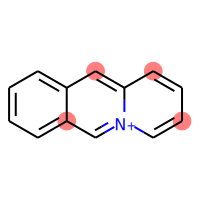

In [42]:
sm = "C1=CC=C2C=C3C=CC=C[N+]3=CC2=C1"
m = Chem.MolFromSmiles(sm)
d = rdMolDraw2D.MolDraw2DSVG(200, 200)
d.SetFontSize(0.75)
hit_ats = [4, 6, 8, 12]
rdMolDraw2D.PrepareAndDrawMolecule(d, m, highlightAtoms=hit_ats)
d.FinishDrawing()
svg = d.GetDrawingText()
display(SVG(svg.replace('svg:','')))

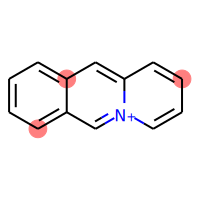

In [43]:
sm = "C1=CC=C2C=C3C=CC=C[N+]3=CC2=C1"
m = Chem.MolFromSmiles(sm)
d = rdMolDraw2D.MolDraw2DSVG(200, 200)
d.SetFontSize(0.75)
hit_ats = [3, 7, 13]
rdMolDraw2D.PrepareAndDrawMolecule(d, m, highlightAtoms=hit_ats)
d.FinishDrawing()
svg = d.GetDrawingText()
display(SVG(svg.replace('svg:','')))

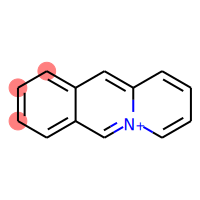

In [44]:
sm = "C1=CC=C2C=C3C=CC=C[N+]3=CC2=C1"
m = Chem.MolFromSmiles(sm)
d = rdMolDraw2D.MolDraw2DSVG(200, 200)
d.SetFontSize(0.75)
hit_ats = [0, 1, 2]
rdMolDraw2D.PrepareAndDrawMolecule(d, m, highlightAtoms=hit_ats)
d.FinishDrawing()
svg = d.GetDrawingText()
display(SVG(svg.replace('svg:','')))

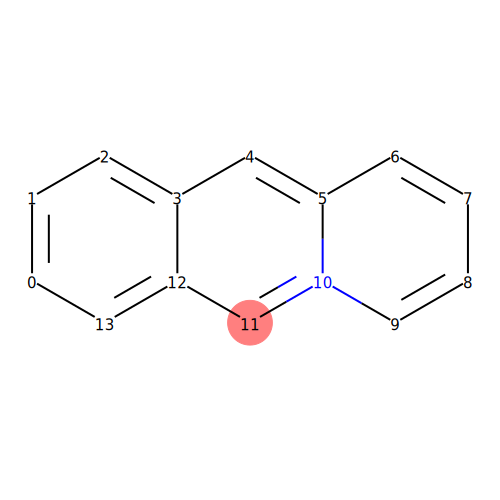